In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00



--- Regression Performance ---
MAE   : 3.9021
RMSE  : 5.6278
R²    : 0.9997


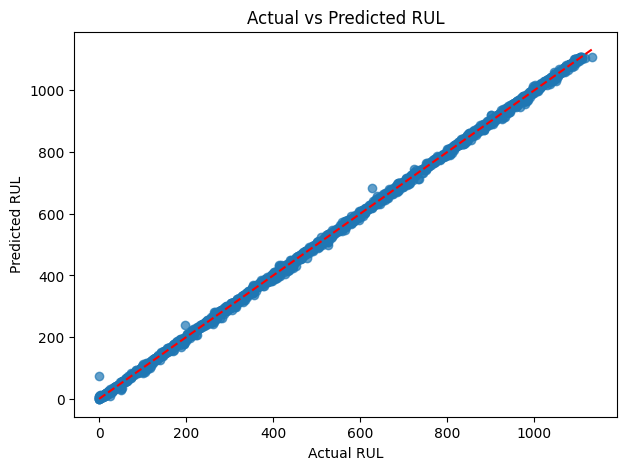


Model saved as 'catboost_rul_model.pkl'


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import joblib
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Battery_RUL.csv")

# Features and target
X = df.drop(columns=["RUL"])
y = df["RUL"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define CatBoost Regressor
model = CatBoostRegressor(
    verbose=0,
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    random_seed=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# --- Evaluation Metrics ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Regression Performance ---")
print(f"MAE   : {mae:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R²    : {r2:.4f}")

# --- Visualization ---
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")
plt.savefig("actual_vs_predicted.png")
plt.show()

# --- Save Model ---
joblib.dump(model, "catboost_rul_model.pkl")
print("\nModel saved as 'catboost_rul_model.pkl'")


In [12]:
import joblib
import pandas as pd

# --- Load saved model ---
model = joblib.load("catboost_rul_model.pkl")

# --- Ask user for input values ---
print("Enter the following parameters:")

cycle_index = float(input("Cycle_Index: "))
discharge_time = float(input("Discharge Time (s): "))
decrement = float(input("Decrement 3.6-3.4V (s): "))
max_voltage = float(input("Max. Voltage Dischar. (V): "))
min_voltage = float(input("Min. Voltage Charg. (V): "))
time_at_415 = float(input("Time at 4.15V (s): "))
time_constant_current = float(input("Time constant current (s): "))
charging_time = float(input("Charging time (s): "))

# --- Prepare input with exact training columns ---
sample = pd.DataFrame([[
    cycle_index,
    discharge_time,
    decrement,
    max_voltage,
    min_voltage,
    time_at_415,
    time_constant_current,
    charging_time
]], columns=[
    "Cycle_Index",
    "Discharge Time (s)",
    "Decrement 3.6-3.4V (s)",
    "Max. Voltage Dischar. (V)",
    "Min. Voltage Charg. (V)",
    "Time at 4.15V (s)",
    "Time constant current (s)",
    "Charging time (s)"
])

# --- Predict RUL ---
predicted_rul = model.predict(sample)[0]
print(f"\n✅ Predicted Remaining Useful Life (RUL): {predicted_rul:.2f}")


Enter the following parameters:
Cycle_Index: 7
Discharge Time (s): 87
Decrement 3.6-3.4V (s): 7
Max. Voltage Dischar. (V): 78
Min. Voltage Charg. (V): 78
Time at 4.15V (s): 4
Time constant current (s): 1
Charging time (s): 45

✅ Predicted Remaining Useful Life (RUL): 911.67
